<h1><center>Programming Exercise 6:<br>Support Vector Machines</center></h1>

In [38]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import svm
import L67Data
from numpy import linalg as LA
import re
from nltk.stem import PorterStemmer

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Support Vector Machines
- Use SVMs with various example 2D dataset

## 1.1 Examples Dataset 1
- The data in `ex6data1.mat` can be separated by a linear boundary. The positions of the positive examples (+) and the negative examples (o) suggest a natural separation indicated by the gap. However, there is an outlier positive example on the far left at about (0.1,0.4). We will see how this outlier affects the SVM decision boundary

In [2]:
data1 = loadmat('ex6data1.mat')
X = data1['X'] # no need to add the bias terms, the svm object does it internally
y = data1['y'].flatten() # output labels

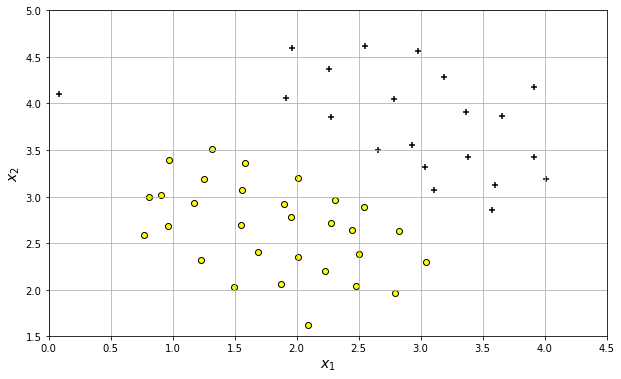

In [3]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.show()

- Try different values of the $C$ parameter with SVMs
- Informally $C$ is a positive value that controls the penalty for misclassified training examples. A large $C$ parameters tells the SVM to try to classify all examples correctly. $C$ plays a role similar to $1/\lambda$, the reg. parameter for logistic regression
- Train the SVM with both $C=1$ and $C=100$
- We use an SVM from the sklearn library

In [4]:
svc = svm.SVC(C=1.0,kernel='linear') # initialize linear SVM instance

In [5]:
svc.fit(X,y) # train classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Perform prediction over grid:

In [6]:
# Create a mesh to plot in
h = .02  # Step size in the mesh
x_min, x_max = 0, 4.5
y_min, y_max = 1.5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

- Plot over mesh but first make a custom colormap since we want to plot the two classes as either yellow ($y=0$) or black ($y=1$)

In [7]:
yellow_black = L67Data.make_colormap(['yellow','k'])

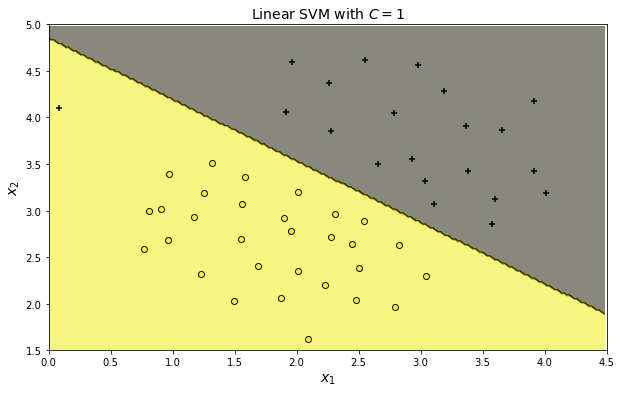

In [8]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Linear SVM with $C=1$',fontsize=14)
plt.show()

- As we can see, this corresponds to somewhat of an "underfit" i.e the + point around (0.1,0.4) is not classified correctly. This is expected since $C$ is small
- Now let's try $C=100$:

In [9]:
svc = svm.SVC(C=100.0,kernel='linear') 
svc.fit(X,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

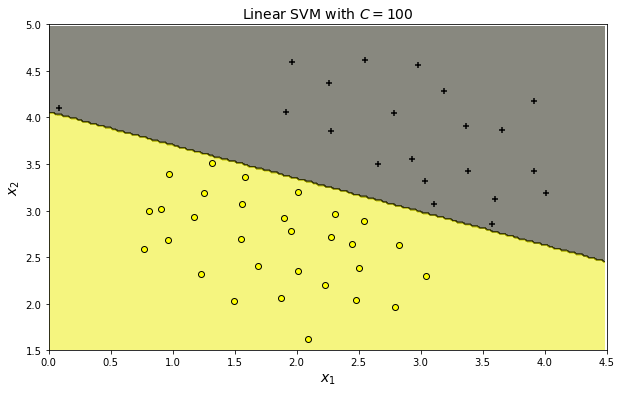

In [11]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Linear SVM with $C=100$',fontsize=14)
plt.show()

- Now the SVM classifies every single example correctly but the decision boundary that does not appear to be a natural fit for the data. A more "overfit" classification is expected since $C$ is larger

## 1.2 SVM with Gaussian Kernels
- Use SVMs with Gaussian kernels to do non-linear classification on datasets that are not linearly separable
- We'll train using sklearn.svm.SVC's Gaussian kernel later on but we'll build the Gaussian kernel function anyways and test the parameters they give in ex6.m
- Recall that the Gaussian kernel function is degined as:

$$
K_{\text{gaussian}}(x^{(i)},x^{(j)})=\exp\left(-\frac{\lVert x^{(i)}-x^{(j)}\rVert^2}{2\sigma^2}\right) = \exp\left(-\frac{\sum_{k=1}^n(x^{(i)}-x^{(j)})^2}{2\sigma^2}\right)
$$

In [12]:
def similarity(x1,x2,sigma):
    '''
    Returns a radial basis function kernel between samples x1 and x2
    
    Parameters
    ------------
    x1 (1D arr): first sample n-dimensional vector
    x2 (1D arr): second sample n-dimensional vector
    
    Returns
    ------------
    sim (float): similarity function value at vectors x1 and x2
    '''
    
    sim = np.exp(-LA.norm(x1-x2)**2/(2*sigma**2))
    return sim

- Test it:

In [13]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
similarity(x1,x2,sigma) # should be = 0.324652

0.32465246735834974

- The following dataset is not linearly separable. Let's load it and plot it:

In [14]:
data2 = loadmat('ex6data2.mat')
X = data2['X'] # no need to add the bias terms, the svm object does it internally
y = data2['y'].flatten() # output labels

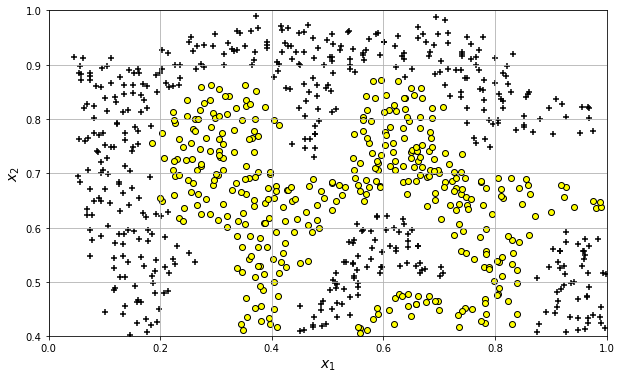

In [15]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.show()

- Now we train an Gaussian-kernel SVM with $C=1$ and $\sigma=0.1$
- sklearn.svm.SVC's kernel `rbf` is the Gaussian kernel but with a slightly different definition, that is $\exp(-\gamma\lVert x-x'\rVert^2)$. Thus we relate $\sigma$ to $\gamma$ as:

$$
\gamma = \frac{1}{2\sigma^2}
$$

In [16]:
sigma = 0.1
gamma = 1/(2*sigma**2)
svc = svm.SVC(C=100.0,kernel='rbf',gamma=gamma) 
svc.fit(X,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
# Create a mesh to plot in
h = .02  # Step size in the mesh
x_min, x_max = 0, 1.1
y_min, y_max = 0.4, 1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

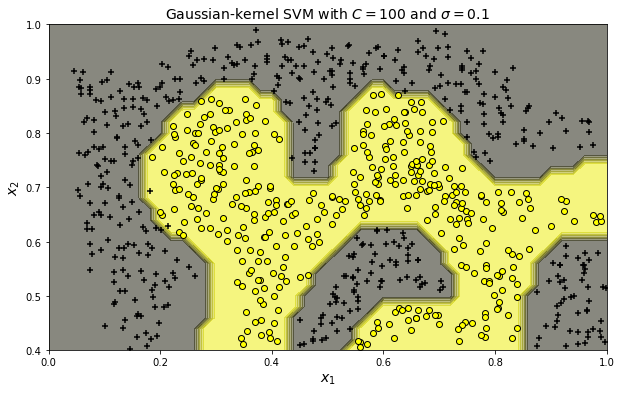

In [18]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Gaussian-kernel SVM with $C=100$ and $\sigma=0.1$',fontsize=14)
plt.show()

- This decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well
- Now let's look at the next non-linearly separable set:

In [19]:
data3 = loadmat('ex6data3.mat')
X = data3['X'] # no need to add the bias terms, the svm object does it internally
y = data3['y'].flatten() # output labels
Xval = data3['Xval'] # validation set
yval = data3['yval'].flatten()

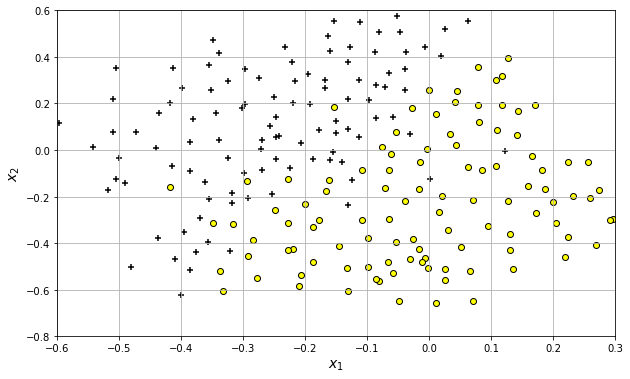

In [20]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(-0.6,0.3)
plt.ylim(-0.8,0.6)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.show()

- Now we will use the cross validation set `Xval` and `yval` to determine the best $C$ and $\sigma$ parameters to use from values (0.01,0.03,0.1,0.3,1,3,10,30) for each respectively. This means we need to test $8^2=64$ total models and pick the one with the best score (accuracy)
- The easiest way to do is to perfrom a grid search over parameters using sklearn.model_selection.GridSearchCV but there is no way to explicitly pass in a validation set apart from the training set. GridSearchCV does a K-cross validation internally once given training `X` and `y`. Thus we do it manually (which is not that difficult after all)

In [21]:
c_vals = np.array([0.01,0.03,0.1,0.3,1,3,10,30])
sigma_vals = c_vals

In [22]:
best_score = 0 # initialize to zero

# Loop through params and look for best score
for ii_c in c_vals:
    for ii_sigma in sigma_vals:
            ii_gamma = 1/(2*ii_sigma**2)
            ii_svc = svm.SVC(C=ii_c,kernel='rbf',gamma=ii_gamma) # initialize SVM with params
            ii_svc.fit(X,y) # fit model to training set
            ii_score = ii_svc.score(Xval,yval) # test on cv set and get score (accuracy)
            if ii_score > best_score:
                best_score = ii_score
                optimal_C = ii_c
                optimal_sigma = ii_sigma
                optimal_gamma = ii_gamma

In [23]:
print("Best parameters set found on cv set:\n{{'C': {}, 'sigma': {}}}\n".format(optimal_C,optimal_sigma))
print("Best score with this set: {}".format(best_score))

Best parameters set found on cv set:
{'C': 1.0, 'sigma': 0.1}

Best score with this set: 0.965


- Now let's train to this optimal set and plot the classified feature space:

In [24]:
svc = svm.SVC(C=optimal_C,kernel='rbf',gamma=optimal_gamma)
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=49.999999999999993,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
# Create a mesh to plot in
h = .02  # Step size in the mesh
x_min, x_max = -0.6, 0.4
y_min, y_max = -0.8, 0.7
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh
z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
z_svc = z_svc.reshape(xx.shape)

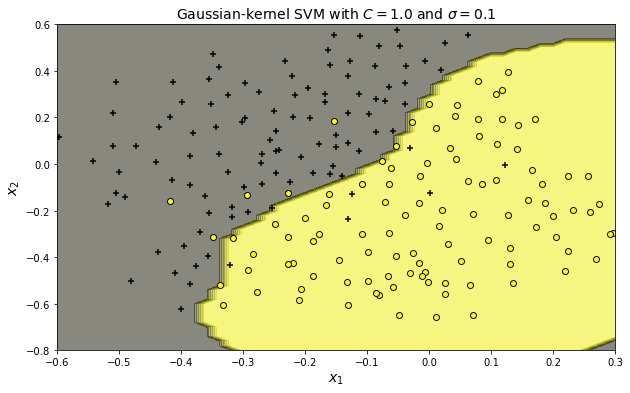

In [26]:
plt.figure()
#cs = plt.contour(xx,yy,z_svc,levels=[0],colors='b',linestyles='-',linewidths=2) # explicitly plot decision boundary
# plt.clabel(cs, fmt = '%2.1d', colors = 'b', fontsize=14) # label decision boundary contour line
csf = plt.contourf(xx,yy,z_svc,cmap=yellow_black,alpha=0.5) # classified feature space
#plt.colorbar(csf)
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='+',edgecolors='k',facecolor='k')
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',edgecolors='k',facecolor='yellow')
plt.xlim(-0.6,0.3)
plt.ylim(-0.8,0.6)
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'$x_2$',fontsize=14)
plt.title(r'Gaussian-kernel SVM with $C={}$ and $\sigma={}$'.format(optimal_C,optimal_sigma),fontsize=14)
plt.show()

# 2. Spam Classification
- Use SVMs to build our own spam filter. We will train a classifier to classify wether a given email $x\in\mathbb{R}^n$ is spam ($y=1$) or non-spam ($y=-1$)
- We need to first convert each email (body only, no header) into a feature vector $x$

## 2.1 Preprocessing Emails
- Normalize different parts present in an email which makes it easier for classification
- For example, each URL in the email will be replaced with the unique strin "httpaddr" to indicate a URL is present. This has the effect of letting the spam classifier make a classification decision based on whether any URL was present rather than a specific one; this generalizes the classification and will help performance
- The following pre-processing and normalization needs to be done:
    1. Lower-casing (the entire email)
        - e.g IndIcaTE and Indicate treated the same
    2. Stripping HTML
        - All html tags are removed from emails so only the content remains
    3. Normalizing URLs
        - All urls are replaced with the text "httaddr"
    4. Normalizing Email Addreses
        - All email addresses are placed with the text "emailaddr"
    5. Normalizing Numbers
        - All numbers are replaced with the test "number"
    6. Normalizing Dollar Signs
        - All dollar signs ($) are replaced with the text "dollar"
    7. Word Stemming
        - Words reduced to their stem form, e.g "discount", "discounts", "discounted" and "discounting" are all replaced with "discount". The stemmer sometimes strips off additional charactes from the end so "include", "includes", "included" and "including" are all replaced with "includ"
    8. Removal of non-words
        - Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character

In [47]:
# Load Email
email = open('emailSample1.txt', 'r' ).read()
email # it's a str

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

- The following vocabulary list was selected by choosing all words which occur at least 100 times in the spam corpus, resulting in a list of 1899 words:

In [90]:
# Load vocab list
_,vocab_list = np.loadtxt('vocab.txt',dtype=bytes,unpack=True) # first row (tranposed column) are vocab list numbers
                                                               # np.loadtxt operates in byte mode but Python 3 uses unicode and marks bytestrings with b 
vocab_list = vocab_list.astype(str) # from byte to string

- To normalize the email we can make use of the `re` python module which "provides Perl-style regular expression patterns...you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways." see https://docs.python.org/2/howto/regex.html
- To stem the words we use the Porter Stemmer implemented in the Natural Language Toolkit (`nltk` module); see https://marcobonzanini.com/2015/01/26/stemming-lemmatisation-and-pos-tagging-with-python-and-nltk/

In [213]:
def processEmail(email,vocab_list):
    '''
    Processes an email's body through the steps listed above (1-8) and
    computes which (if any) words are present in a pre-determined vocab
    list 
    
    Parameters
    ------------
    email (str): body of the email
    vocab_list (1D arr): array of vocabulary words to look for in email
    
    Returns
    ------------
    email_word_indices (1D arr): indices of email's words in vocab list
    '''
    
    ## Pre-processing ##
    email = email.lower() # lower case the entire email
    email = re.sub('<[^<]+?>','',email) # remove html tags
    email = re.sub('(http|https)://[^\s]*','httpaddr',email) # normalize URLs
    email = re.sub('[^\s]+@[^\s]+','emailaddr',email) # normalize email addresses 
    email = re.sub('[0-9]+','number',email) # normalize numbers
    email = re.sub('[$]+', 'dollar',email) # normalize $ signs
    email = re.sub('[^a-zA-Z0-9]',' ',email) # removal of non-words
    
    email_words = email.split(' ') # put words in a list, this will contain empty strings ''
    stemmer = PorterStemmer()
    email_words = [str(stemmer.stem(ii_word)) for ii_word in email_words if len(ii_word)!=0] # Remove empty strings ''
                                                                                             # Stem words   
   
    ## Vocabulary List Indices ##   
    email_word_indices = []
    for ii_word in email_words:
        if ii_word in vocab_list:
            index = np.where(vocab_list==ii_word)[0][0]+1 # index of word in vocab_list
            email_word_indices.append(index)
    email_word_indices = np.asarray(email_word_indices)
    
    return email_word_indices

In [118]:
word_indices = processEmail(email,vocab_list)

## 2.2 Extracting Features from Emails
- Now implement feature extraction that converts each email into a vector in $\mathbb{R}^n$ where $n$ = # of words in vocabulary list. Specifically, the feature $x_i\in\{0,1\}$ for an email corresponds to wether the $i$-th word in the dictionary accours in the email, i.e $x_i=1$ if the $i$-th word is in the email and $x_i=0$ otherwise 

In [124]:
def emailFeatures(word_indices,vocab_list):
    '''
    Creates a feature vector out of the word indices of an email
    
    Parameters
    ------------
    word_indices (1D arr): indices of email's words in vocab list
    vocab_list (1D arr): array of vocabulary words to look for in email
    
    Returns
    ------------
    feature_vec (1D arr): 1s in positions where vocab word is in email, of length of vocab list
    '''
    feature_vec = np.zeros(np.shape(vocab_list)[0]) # initialize to all zeros
    feature_vec[word_indices-1] = 1 # shift indices down by one because we labeled them starting at 1
                                    # set entry at that index to 1
    return feature_vec

In [129]:
features = emailFeatures(word_indices,vocab_list)
print('feature vector has length {} and {} non-zero entries'.format(len(features),sum(features==1)))

feature vector has length 1899 and 45 non-zero entries


## 2.3 Training SVM for Spam Classification
- Use a preprocessed training dataset to train a SVM classifier ($y=1$ as spam and $y=0$ as non-spam)
- `spamTrain.mat` contains 4000 training examples of spam and non-spam email while `spamTest.mat` contains 1000 test examples
- Each email has already been processed using the processEmail and emailFeatures functions and converted into a vector $x^{(i)}\in\mathbb{R}^{1899}$

In [192]:
# Load training set
data4 = loadmat('spamTrain.mat')
X,y = data4['X'],data4['y'].flatten()

# Load test set
data5 = loadmat('spamTest.mat')
Xtest,ytest = data5['Xtest'],data5['ytest'].flatten()

- Train linear SVM with $C=0.1$. We expect a training accuracy of about 99.8% and a test accuracy of about 98.5%

In [193]:
svc = svm.SVC(C=0.1,kernel='linear')
svc.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [194]:
svc.score(X,y)

0.99824999999999997

In [195]:
svc.score(Xtest,ytest)

0.98899999999999999

## 2.4 Top Predictors for Spam
- We inspect the parameters of the classifier to see which words it thinks are the most predictive of spam
- SVC.coef_ gives us the weights assigned to the features (coefficients in the primal problem) for a linear SVM

In [174]:
trained_feat_weights = svc.coef_[0]
weight_indices = np.argsort(trained_feat_weights) # returns indices that sorts an array in increasing order
top_15_spam_indices = weight_indices[-15:]
bottom_15_spam_indices = weight_indices[:15]

print('Top 15 predictors for spam email:\n{}\n'.format(vocab_list[top_15_spam_indices[::-1]]))
print('Bottom 15 predictors for spam email:\n{}'.format(vocab_list[bottom_15_spam_indices]))

Top 15 predictors for spam email:
['our' 'click' 'remov' 'guarante' 'visit' 'basenumb' 'dollar' 'will'
 'price' 'pleas' 'most' 'nbsp' 'lo' 'ga' 'hour']

Bottom 15 predictors for spam email:
['spamassassin' 'the' 'url' 'wrote' 'date' 'list' 'rpm' 'numbertnumb'
 'user' 'until' 'author' 'razor' 'yahoo' 'tom' 'httpaddr']


## 2.5 Optional Exercise: Try Your Own Emails
- Try out other examples provided with the learned SVM and see if it gets them right
- The examples are:
    - Emails: `emailSample1.txt` and `emailSample2.txt`
    - Spam: `spamSample1.txt` and `spamSample2.txt`

In [218]:
# Load samples
email1 = open('emailSample1.txt','r').read()
email2 = open('emailSample2.txt','r').read()
spam1 = open('spamSample1.txt','r').read()
spam2 = open('spamSample2.txt','r').read()

# Pre-process samples
email1_word_indices = processEmail(email1,vocab_list)
email2_word_indices = processEmail(email2,vocab_list)
spam1_word_indices = processEmail(spam1,vocab_list)
spam2_word_indices = processEmail(spam2,vocab_list)

# Get feature vectors
email1_features = emailFeatures(email1_word_indices,vocab_list)
email2_features = emailFeatures(email2_word_indices,vocab_list)
spam1_features = emailFeatures(spam1_word_indices,vocab_list)
spam2_features = emailFeatures(spam2_word_indices,vocab_list)

- If we predict on a single sample we have to reshape `X`; see warning when you don't

In [224]:
svc.predict(email1_features.reshape(1, -1))[0]

0

In [225]:
svc.predict(email2_features.reshape(1, -1))[0]

0

In [226]:
svc.predict(spam1_features.reshape(1, -1))[0]

1

In [223]:
svc.predict(spam2_features.reshape(1, -1))[0]

1

- All predicted correctly

## 2.6 Optional Exercise: Build Your Own Dataset
- maybe I'll come back to this part someday...